In [1]:
# Install conda first
!pip install -q condacolab
import condacolab
condacolab.install()

# Install required packages using conda
!conda install -y -c conda-forge rdkit pandas numpy seaborn matplotlib scipy

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw , Lipinski
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import QED
import rdkit
from rdkit.Chem import Descriptors, Lipinski, QED, rdMolDescriptors

# Verify RDKit installation
print("RDKit version:", rdkit.__version__)



✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

RDKit version: 2024.09.3


In [2]:
df = pd.read_csv('bioactivity_preprocessed_data_updated.csv')

In [3]:
def calculate_descriptors(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_ALogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        desc_TPSA = rdMolDescriptors.CalcTPSA(mol)
        desc_QED = QED.qed(mol)
        desc_FractionSp3 = Descriptors.FractionCSP3(mol)
        desc_NumRotatableBonds = Lipinski.NumRotatableBonds(mol)

        row = np.array([desc_MolWt,
                       desc_ALogP,
                       desc_NumHDonors,
                       desc_NumHAcceptors,
                       desc_TPSA,
                       desc_QED,
                       desc_FractionSp3,
                       desc_NumRotatableBonds])

        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    columnNames = ["MW", "ALogP", "HBD", "HBA", "TPSA", "QED", "FractionSP3", "NumRotatableBonds"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

# Example usage
#df_descriptors = calculate_descriptors(df.canonical_smiles)

In [4]:
df_descriptors = calculate_descriptors(df.canonical_smiles)

In [5]:
df_descriptors

,MW,ALogP,HBD,HBA,TPSA,QED,FractionSP3,NumRotatableBonds
0,533.690,7.5019,1.0,6.0,73.86,0.229361,0.354839,13.0
1,519.663,7.4268,1.0,6.0,73.86,0.250946,0.333333,12.0
2,512.027,6.9568,1.0,6.0,73.86,0.280480,0.259259,11.0
3,357.435,2.4909,1.0,6.0,71.53,0.820855,0.277778,7.0
4,491.609,6.6935,1.0,6.0,73.86,0.284487,0.285714,12.0
...,...,...,...,...,...,...,...,...
2159,514.217,7.4415,1.0,4.0,68.29,0.300722,0.000000,5.0
2160,480.546,3.6868,1.0,9.0,102.88,0.465301,0.250000,10.0
2161,474.560,6.8991,1.0,4.0,64.35,0.265684,0.096774,8.0
2162,494.374,7.3989,1.0,4.0,72.56,0.276402,0.185185,8.0


In [6]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,291.0,active
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,170.0,active
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,73.0,active
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,250.0,active
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,195.0,active
...,...,...,...,...
2159,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,18.0,active
2160,CHEMBL3585580,COc1ccc(Oc2cc(N(C)CCOc3ccc(CC4SC(=O)NC4=O)cc3)...,18.0,active
2161,CHEMBL247920,CCc1c(-c2ccccc2)c(-c2ccccc2)nn1-c1ccccc1-c1ccc...,10000.0,intermediate
2162,CHEMBL5420532,O=C(O)Cc1ccc(-c2ccc(OCc3c(-c4c(Cl)cccc4Cl)noc3...,10000.0,intermediate


In [7]:
df_combined = pd.concat([df,df_descriptors], axis=1)

In [8]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,ALogP,HBD,HBA,TPSA,QED,FractionSP3,NumRotatableBonds
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,291.0,active,533.690,7.5019,1.0,6.0,73.86,0.229361,0.354839,13.0
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,170.0,active,519.663,7.4268,1.0,6.0,73.86,0.250946,0.333333,12.0
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,73.0,active,512.027,6.9568,1.0,6.0,73.86,0.280480,0.259259,11.0
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,250.0,active,357.435,2.4909,1.0,6.0,71.53,0.820855,0.277778,7.0
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,195.0,active,491.609,6.6935,1.0,6.0,73.86,0.284487,0.285714,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2159,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,18.0,active,514.217,7.4415,1.0,4.0,68.29,0.300722,0.000000,5.0
2160,CHEMBL3585580,COc1ccc(Oc2cc(N(C)CCOc3ccc(CC4SC(=O)NC4=O)cc3)...,18.0,active,480.546,3.6868,1.0,9.0,102.88,0.465301,0.250000,10.0
2161,CHEMBL247920,CCc1c(-c2ccccc2)c(-c2ccccc2)nn1-c1ccccc1-c1ccc...,10000.0,intermediate,474.560,6.8991,1.0,4.0,64.35,0.265684,0.096774,8.0
2162,CHEMBL5420532,O=C(O)Cc1ccc(-c2ccc(OCc3c(-c4c(Cl)cccc4Cl)noc3...,10000.0,intermediate,494.374,7.3989,1.0,4.0,72.56,0.276402,0.185185,8.0


In [9]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [10]:
df_combined.standard_value.describe()

,standard_value
count,2164.000000
mean,6703.828169
std,31652.697920
min,0.060000
25%,35.850000
50%,449.390000
75%,3981.070000
max,1000000.000000


In [11]:
-np.log10( (10**-9)* 100000000 )

1.0

In [12]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [13]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [14]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,ALogP,HBD,HBA,TPSA,QED,FractionSP3,NumRotatableBonds,standard_value_norm
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,active,533.690,7.5019,1.0,6.0,73.86,0.229361,0.354839,13.0,291.0
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,active,519.663,7.4268,1.0,6.0,73.86,0.250946,0.333333,12.0,170.0
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,active,512.027,6.9568,1.0,6.0,73.86,0.280480,0.259259,11.0,73.0
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,active,357.435,2.4909,1.0,6.0,71.53,0.820855,0.277778,7.0,250.0
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,active,491.609,6.6935,1.0,6.0,73.86,0.284487,0.285714,12.0,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2159,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,active,514.217,7.4415,1.0,4.0,68.29,0.300722,0.000000,5.0,18.0
2160,CHEMBL3585580,COc1ccc(Oc2cc(N(C)CCOc3ccc(CC4SC(=O)NC4=O)cc3)...,active,480.546,3.6868,1.0,9.0,102.88,0.465301,0.250000,10.0,18.0
2161,CHEMBL247920,CCc1c(-c2ccccc2)c(-c2ccccc2)nn1-c1ccccc1-c1ccc...,intermediate,474.560,6.8991,1.0,4.0,64.35,0.265684,0.096774,8.0,10000.0
2162,CHEMBL5420532,O=C(O)Cc1ccc(-c2ccc(OCc3c(-c4c(Cl)cccc4Cl)noc3...,intermediate,494.374,7.3989,1.0,4.0,72.56,0.276402,0.185185,8.0,10000.0


In [15]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,2164.000000
mean,6703.828169
std,31652.697920
min,0.060000
25%,35.850000
50%,449.390000
75%,3981.070000
max,1000000.000000


In [16]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,ALogP,HBD,HBA,TPSA,QED,FractionSP3,NumRotatableBonds,pIC50
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,active,533.690,7.5019,1.0,6.0,73.86,0.229361,0.354839,13.0,6.536107
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,active,519.663,7.4268,1.0,6.0,73.86,0.250946,0.333333,12.0,6.769551
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,active,512.027,6.9568,1.0,6.0,73.86,0.280480,0.259259,11.0,7.136677
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,active,357.435,2.4909,1.0,6.0,71.53,0.820855,0.277778,7.0,6.602060
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,active,491.609,6.6935,1.0,6.0,73.86,0.284487,0.285714,12.0,6.709965
...,...,...,...,...,...,...,...,...,...,...,...,...
2159,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,active,514.217,7.4415,1.0,4.0,68.29,0.300722,0.000000,5.0,7.744727
2160,CHEMBL3585580,COc1ccc(Oc2cc(N(C)CCOc3ccc(CC4SC(=O)NC4=O)cc3)...,active,480.546,3.6868,1.0,9.0,102.88,0.465301,0.250000,10.0,7.744727
2161,CHEMBL247920,CCc1c(-c2ccccc2)c(-c2ccccc2)nn1-c1ccccc1-c1ccc...,intermediate,474.560,6.8991,1.0,4.0,64.35,0.265684,0.096774,8.0,5.000000
2162,CHEMBL5420532,O=C(O)Cc1ccc(-c2ccc(OCc3c(-c4c(Cl)cccc4Cl)noc3...,intermediate,494.374,7.3989,1.0,4.0,72.56,0.276402,0.185185,8.0,5.000000


In [17]:
df_final.pIC50.describe()

,pIC50
count,2164.000000
mean,6.450498
std,1.273505
min,3.000000
25%,5.400000
50%,6.347377
75%,7.445522
max,10.221849


In [18]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,ALogP,HBD,HBA,TPSA,QED,FractionSP3,NumRotatableBonds,pIC50
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,active,533.690,7.5019,1.0,6.0,73.86,0.229361,0.354839,13.0,6.536107
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,active,519.663,7.4268,1.0,6.0,73.86,0.250946,0.333333,12.0,6.769551
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,active,512.027,6.9568,1.0,6.0,73.86,0.280480,0.259259,11.0,7.136677
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,active,357.435,2.4909,1.0,6.0,71.53,0.820855,0.277778,7.0,6.602060
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,active,491.609,6.6935,1.0,6.0,73.86,0.284487,0.285714,12.0,6.709965
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,CHEMBL50,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,inactive,302.238,1.9880,5.0,7.0,131.36,0.434190,0.000000,1.0,4.585027
2155,CHEMBL150,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,inactive,286.239,2.2824,4.0,6.0,111.13,0.545851,0.000000,1.0,4.636388
2156,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,active,348.378,3.7166,0.0,4.0,40.80,0.408941,0.190476,2.0,6.247184
2159,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,active,514.217,7.4415,1.0,4.0,68.29,0.300722,0.000000,5.0,7.744727


In [19]:
df_2class.to_csv('pic50formodelbuild_preprocessed_data_updated.csv', index=False)

In [ ]:
! ls -l

total 556
-rw-r--r-- 1 root root 191985 Dec 16 19:46 bioactivity_preprocessed_data_updated.csv
-rw-r--r-- 1 root root  22944 Dec 16 19:46 condacolab_install.log
-rw-r--r-- 1 root root 344458 Dec 16 20:08 pic50formodelbuild_preprocessed_data_updated.csv
drwxr-xr-x 1 root root   4096 Dec 12 14:22 sample_data


In [ ]:
! cp pic50formodelbuildpic50formodelbuild_preprocessed_data_updated.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/data"

ls: cannot access '/content/gdrive/My Drive/Colab Notebooks/data': No such file or directory


# **EDA**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

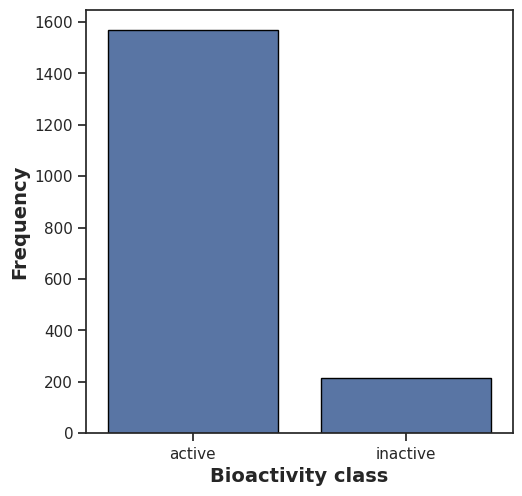

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**



It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs ALogP.

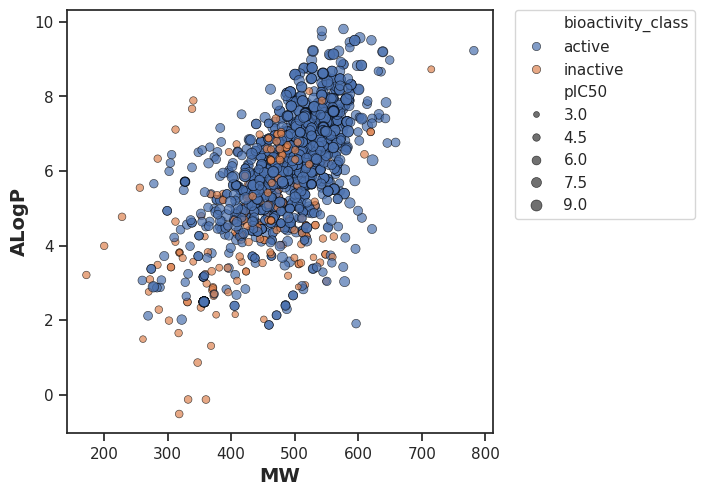

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='ALogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('ALogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_ALogP.pdf')

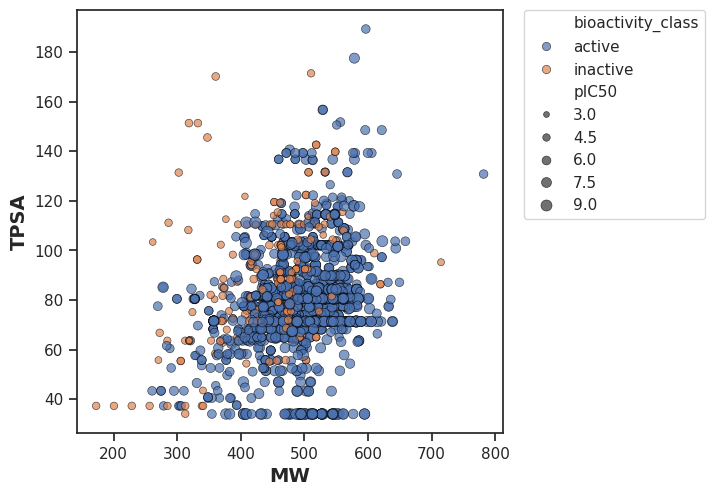

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='TPSA', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('TPSA', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_TPSA.pdf')

### **Box plots**

#### **pIC50 value**

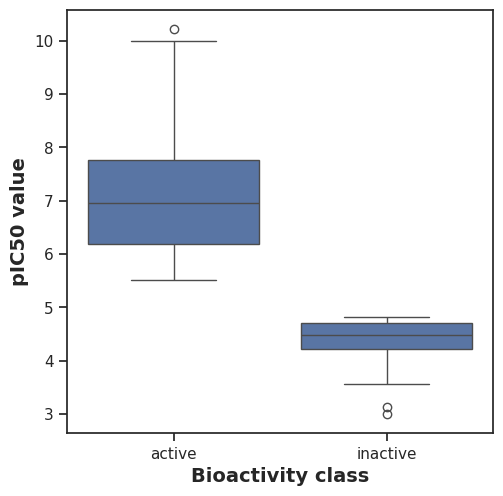

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,334197.0,2.604556e-124,0.05,Different distribution (reject H0)


In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,230954.0,1.283135e-19,0.05,Different distribution (reject H0)


In [ ]:
mannwhitney('ALogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,ALogP,243856.0,1.248193e-27,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW_vs_ALogP.pdf (deflated 3%)
  adding: mannwhitneyu_ALogP.csv (deflated 8%)
  adding: plot_MW_vs_TPSA.pdf (deflated 2%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: pic50formodelbuild_preprocessed_data_updated.csv (deflated 80%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: bioactivity_preprocessed_data_updated.csv (deflated 85%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
